# How to Use Discretization Transforms for Machine Learning
https://machinelearningmastery.com/discretization-transforms-for-machine-learning/

One approach is to use transform of the numerical variable to have a discrete probability distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship.

This is called a **binning** or a **discretization transform** and can improve the performance of some machine learning models for datasets by making the probability distribution of numerical input variables discrete.



- Binning, also known as categorization or discretization, is the process of translating a quantitative variable into a set of two or more qualitative buckets (i.e., categories)
- Values for the variable are grouped together into discrete bins and each bin is assigned a unique integer such that the ordinal relationship between the bins is preserved.
- The use of bins is often referred to as binning or k-bins, where k refers to the number of groups to which a numeric variable is mapped.

common techniques for grouping the values into k discrete bins:

- Uniform: Each bin has the same width in the span of possible values for the variable.
- Quantile: Each bin has the same number of values, split based on percentiles.
- Clustered: Clusters are identified and examples are assigned to each group.

# KBinsDiscretizer class

- The “strategy” argument controls the manner in which the input variable is divided, as either “uniform,” “quantile,” or “kmeans.”

- The “n_bins” argument controls the number of bins that will be created and must be set based on the choice of strategy, e.g. “uniform” is flexible, “quantile” must have a “n_bins” less than the number of observations or sensible percentiles, and “kmeans” must use a value for the number of clusters that can be reasonably found.

- The “encode” argument controls whether the transform will map each value to an integer value by setting “ordinal” or a one-hot encoding “onehot.” An ordinal encoding is almost always preferred, although a one-hot encoding may allow a model to learn non-ordinal relationships between the groups, such as in the case of k-means clustering strategy.

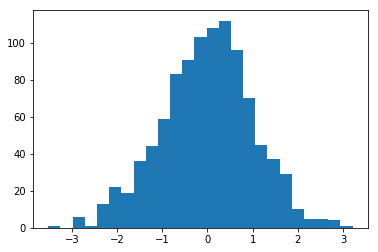

[[4.]
 [5.]
 [6.]
 [4.]
 [2.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]]


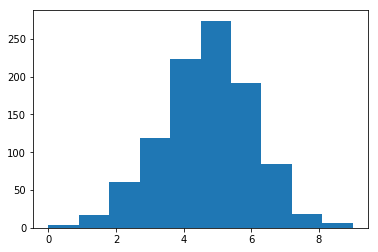

In [2]:
# demonstration of the discretization transform
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
%matplotlib inline
# generate gaussian data sample
data = randn(1000)
# histogram of the raw data
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)
# summarize first few rows
print(data_trans[:10, :])
# histogram of the transformed data
pyplot.hist(data_trans, bins=10)
pyplot.show()

# Sonar Dataset (binary classification)

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9      ...              50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788

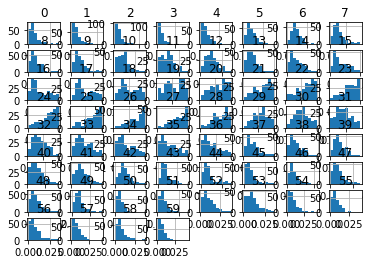

In [3]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

# use knn on the raw sonar dataset

In [4]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


# Uniform Discretization Transform

A uniform discretization transform will preserve the probability distribution of each input variable but will make it discrete with the specified number of ordinal groups or labels.

We can apply the uniform discretization transform using the KBinsDiscretizer class and setting the “strategy” argument to “uniform.” We must also set the desired number of bins set via the “n_bins” argument; in this case, we will use 10.

Once defined, we can call the fit_transform() function and pass it our dataset to create a quantile transformed version of our dataset.

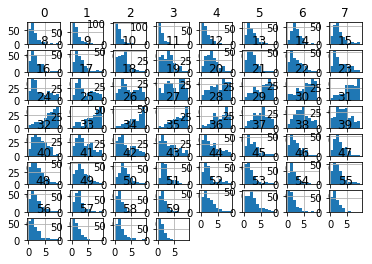

In [9]:
# visualize a uniform ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

## use knn on uniform transformed data

In [10]:
# evaluate knn on the sonar dataset with uniform ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.827 (0.082)


# K-means Discretization Transform

- A K-means discretization transform will attempt to fit k clusters for each input variable and then assign each observation to a cluster.

- Unless the empirical distribution of the variable is complex, the number of clusters is likely to be small, such as 3-to-5.

- We can apply the K-means discretization transform using the KBinsDiscretizer class and setting the “strategy” argument to “kmeans.” We must also set the desired number of bins set via the “n_bins” argument; in this case, we will use three.

- Once defined, we can call the fit_transform() function and pass it to our dataset to create a quantile transformed version of our dataset.

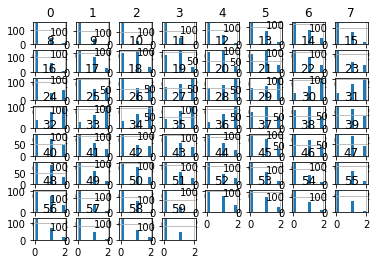

In [11]:
# visualize a k-means ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

## use knn on k-means transformed data

In [12]:
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.814 (0.088)


# Quantile Discretization Transform

- A quantile discretization transform will attempt to split the observations for each input variable into k groups, where the number of observations assigned to each group is approximately equal.

- Unless there are a large number of observations or a complex empirical distribution, the number of bins must be kept small, such as 5-10.

- We can apply the quantile discretization transform using the KBinsDiscretizer class and setting the “strategy” argument to “quantile.” We must also set the desired number of bins set via the “n_bins” argument; in this case, we will use 10.

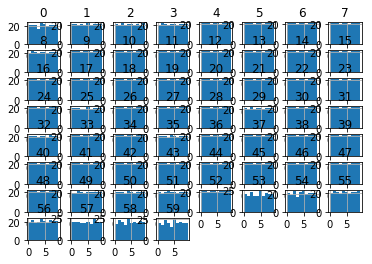

In [13]:
# visualize a quantile ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a quantile discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

## use knn on quantile transformed data

In [15]:
# evaluate knn on the sonar dataset with quantile ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.072)


## tune the n_bins from 2 to 10

>2 0.806 (0.080)
>3 0.867 (0.070)
>4 0.835 (0.083)
>5 0.838 (0.070)
>6 0.836 (0.071)
>7 0.854 (0.071)
>8 0.837 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


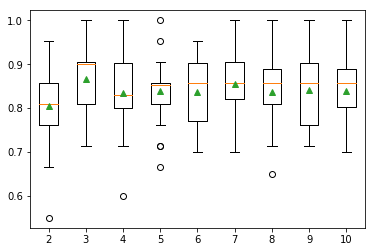

In [17]:
# explore number of discrete bins on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset


def get_dataset():
    # load dataset
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
    dataset = read_csv(url, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# get a list of models to evaluate


def get_models():
    models = dict()
    for i in range(2, 11):
        # define the pipeline
        trans = KBinsDiscretizer(
            n_bins=i, encode='ordinal', strategy='quantile')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a give model using cross-validation


def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(
        model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()